### Desription ###
-portypes only M and L Medium and Large
-Not taking Denmark because all of their big ports are on the other side

In [2]:
import folium
from folium.plugins import MarkerCluster
import math
import pandas as pd

df = pd.read_csv('World_Port_Index.csv')

# List of countries to include
countries_to_include = ['DE', 'BE', 'NL', 'NO', 'GB', 'DK', 'FR']
excluded_ports = ['KIEL', 'LUBECK', 'ROSTOCK', 'TRONDHEIM',
                  'HARSTAD', 'TROMSO', 'HAMMERFEST', 'TOULON',
                  'BAYONNE', 'BORDEAUX', 'ROCHEFORT', 'LA PALLICE',
                  'LA ROCHELLE', 'NANTES', 'ST NAZAIRE', 'MONTOIR',
                  'LORIENT', 'RADE DE BREST', 'RADE DE CHERBOURG',
                  'PORT OF LE HAVRE', 'PORT OF ROUEN', 'BOULOGNE-SUR-MER',
                  'GENT', 'PORTSMOUTH HARBOUR', 'SOUTHAMPTON', 'PORTLAND HARBOUR', 'PLYMOUTH',
                  'FALMOUTH HARBOUR', 'BRISTOL', 'NEWPORT', 'CARDIFF', 'BARRY',
                  'MILFORD HAVEN', 'LIVERPOOL', 'MANCHESTER', 'BARROW IN FURNESS',
                  'BELFAST', 'LONDONDERRY', 'GLASGOW', 'GREENOCK', 'KOBENHAVN',
                  'ARHUS', 'STUDSTRUP', 'FECAMP']

# Index number to exclude
excluded_index = 36960

# Filter the DataFrame for medium and large harbor sizes, and only include the specified countries, excluding the specific ports and INDEX_NO 36960
df_filtered = df[
    (df['HARBORSIZE'].isin(['L', 'M', 'S'])) &
    (df['COUNTRY'].isin(countries_to_include)) &
    (~df['PORT_NAME'].isin(excluded_ports)) &
    (df['INDEX_NO'] != excluded_index)  # Exclude port with INDEX_NO 36960
]


# Create a Folium map centered at a global view
m_1 = folium.Map(location=[20, 0], tiles='openstreetmap', zoom_start=2)  # More global center and zoomed out

# Create a marker cluster
mc = MarkerCluster()

# Iterate through the filtered DataFrame and add markers
for _, row in df_filtered.iterrows():
    if not math.isnan(row['LONGITUDE']) and not math.isnan(row['LATITUDE']):
        mc.add_child(folium.Marker(
            [row['LATITUDE'], row['LONGITUDE']],
            popup=row['PORT_NAME']
        ))

# Add marker cluster to the map
m_1.add_child(mc)

# Display the map
# m_1

# saving file
df_filtered.to_csv('filtered_port_old.csv', index=False)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/abartashevich/Library/Python/3.12/lib/python/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/abartashevich/Library/Python/3.12/lib/python/site-packages/traitlets/config/application.py", line 1053, in launch_instance
    app.start()
  File "/Users/abartashevich/Library/Python/3.12/lib/python/site-packages/ipykernel/kernelapp.py", line 736, in start
  

AttributeError: _ARRAY_API not found

In [3]:
dd_1 = pd.read_csv('filtered_port.csv')
print(dd_1['PORT_NAME'])

0                 LYNESS
1                 LONDON
2                HARWICH
3                GRIMSBY
4              IMMINGHAM
5     KINGSTON UPON HULL
6              ROTTERDAM
7                HAMBURG
8               CUXHAVEN
9            BREMERHAVEN
10                 BRAKE
11                BREMEN
12                 EMDEN
13        DUNKERQUE PORT
14             AMSTERDAM
15              THYBORON
16         FREDERIKSHAVN
17           SKAGEN HAVN
18             HIRTSHALS
19            SUNDERLAND
20             TYNEMOUTH
21                 BLYTH
22                 LEITH
23                DUNDEE
24              ABERDEEN
25             PETERHEAD
26              TEESPORT
27             ANTWERPEN
28                 GHENT
29             ZEEBRUGGE
30             HAUGESUND
31             STAVANGER
32             PORSGRUNN
33                HORTEN
34               DRAMMEN
35                  OSLO
36              MONGSTAD
37                BERGEN
38                CALAIS
39              GOTEBORG


In [5]:
import folium
from folium.plugins import MarkerCluster
import math
import pandas as pd

df = pd.read_csv('World_Port_Index.csv')

# List of countries to include
countries_to_include = ['DE', 'BE', 'NL', 'NO', 'GB', 'DK', 'FR', 'SE']

# List of ports to include
ports_to_include = [
    # United Kingdom
    'LYNESS', 'LONDON', 'GRIMSBY', 'IMMINGHAM', 'KINGSTON UPON HULL',
    'SUNDERLAND', 'TYNEMOUTH', 'BLYTH', 'LEITH', 'DUNDEE', 'PETERHEAD',
    'ABERDEEN', 'TEESPORT', 'HARWICH', 'TILBURY',
    # Netherlands
    'ROTTERDAM', 'AMSTERDAM', 'MOERDIJK','NORTH SEA PORT', 'GRONINGEN SEAPORTS',
    # Germany
    'HAMBURG', 'CUXHAVEN', 'BREMERHAVEN', 'BRAKE', 'BREMEN', 'EMDEN',
    # France
    'DUNKERQUE PORT', 'CALAIS',
    # Belgium
    'ANTWERPEN', 'GHENT', 'ZEEBRUGGE',
    # Norway
    'STAVANGER', 'HORTEN', 'DRAMMEN', 'OSLO', 'MONGSTAD',
    'BERGEN', 'HAUGESUND', 'NOHRY', 'PORSGRUNN',
    # Sweden
    'GOTEBORG',
    # Denmark
    'HIRTSHALS', 'THYBORON', 'FREDERIKSHAVN', 'SKAGEN HAVN',
]

# Filter the DataFrame to include only the specified countries AND ports
df_filtered = df[(df['COUNTRY'].isin(countries_to_include)) & (df['PORT_NAME'].isin(ports_to_include))]

# Drop columns 'X' and 'Y' before saving to CSV
if 'X' in df_filtered.columns and 'Y' in df_filtered.columns:
    df_filtered_no_xy = df_filtered.drop(columns=['X', 'Y'])
    df_filtered_no_xy.to_csv('filtered_port.csv', index=False)
else:
    # If X and Y columns don't exist, save the filtered DataFrame as is
    df_filtered.to_csv('filtered_port.csv', index=False)

# Create a Folium map centered at the average of all coordinates
# For Northern Europe, a better center would be around the North Sea
m_1 = folium.Map(location=[55, 5], tiles='openstreetmap', zoom_start=5)  # Centered around North Sea

# Create a marker cluster
mc = MarkerCluster()

# Iterate through the filtered DataFrame and add markers
for _, row in df_filtered.iterrows():
    if not math.isnan(row['LONGITUDE']) and not math.isnan(row['LATITUDE']):
        mc.add_child(folium.Marker(
            [row['LATITUDE'], row['LONGITUDE']],
            popup=row['PORT_NAME']
        ))

# Add marker cluster to the map
m_1.add_child(mc)

# Display the map
m_1

df_filtered.to_csv('filtered_ports_mesa.csv')

#X and Y calculations for the ports

In [3]:
import pandas as pd
import numpy as np

# Load your filtered port data
df_filtered = pd.read_csv('filtered_port.csv')

# First, determine the geographic bounds of your ports
min_lon = df_filtered['LONGITUDE'].min()
max_lon = df_filtered['LONGITUDE'].max()
min_lat = df_filtered['LATITUDE'].min()
max_lat = df_filtered['LATITUDE'].max()

# Print the bounds to understand the geographic area
print(f"Geographic bounds: Longitude ({min_lon} to {max_lon}), Latitude ({min_lat} to {max_lat})")

# Function to convert coordinates to grid positions
def convert_to_grid(df, min_lon, max_lon, min_lat, max_lat, grid_size=100):
    """
    Convert geographic coordinates to grid positions.

    Args:
        df: DataFrame with 'LONGITUDE' and 'LATITUDE' columns
        min_lon, max_lon, min_lat, max_lat: Geographic bounds
        grid_size: Size of the grid (default 100x100)

    Returns:
        DataFrame with 'X' and 'Y' columns added at the beginning
    """
    # Add a small buffer to avoid edge positions
    lon_buffer = (max_lon - min_lon) * 0.05
    lat_buffer = (max_lat - min_lat) * 0.05

    adj_min_lon = min_lon - lon_buffer
    adj_max_lon = max_lon + lon_buffer
    adj_min_lat = min_lat - lat_buffer
    adj_max_lat = max_lat + lat_buffer

    # Calculate grid positions
    # Note: X increases eastward (longitude), Y increases northward (latitude)
    # For Mesa grid, typically (0,0) is at the bottom-left
    x_values = ((df['LONGITUDE'] - adj_min_lon) / (adj_max_lon - adj_min_lon) * (grid_size - 1)).round().astype(int)
    y_values = ((df['LATITUDE'] - adj_min_lat) / (adj_max_lat - adj_min_lat) * (grid_size - 1)).round().astype(int)

    # Create a new DataFrame with X and Y at the beginning, followed by all original columns
    new_df = pd.DataFrame()
    new_df['X'] = x_values
    new_df['Y'] = y_values

    # Add all the original columns
    for col in df.columns:
        new_df[col] = df[col]

    return new_df

# Apply the conversion
df_with_grid = convert_to_grid(df_filtered, min_lon, max_lon, min_lat, max_lat)

# Check if there are any overlapping grid positions
grid_positions = df_with_grid[['X', 'Y']].value_counts()
overlaps = grid_positions[grid_positions > 1]
grid_size = 100

if not overlaps.empty:
    print(f"Warning: {len(overlaps)} grid positions have multiple ports:")
    for (x, y), count in overlaps.items():
        overlapping_ports = df_with_grid[(df_with_grid['X'] == x) & (df_with_grid['Y'] == y)]['PORT_NAME'].tolist()
        print(f"  Position ({x}, {y}) has {count} ports: {', '.join(overlapping_ports)}")

    # Optional: Adjust overlapping positions slightly
    print("\nAdjusting overlapping positions...")
    for (x, y), count in overlaps.items():
        ports = df_with_grid[(df_with_grid['X'] == x) & (df_with_grid['Y'] == y)].index

        # Skip the first port (keep its position)
        for i, port_idx in enumerate(ports[1:], 1):
            # Add a small offset based on the port's position in the list
            angle = 2 * np.pi * i / count
            df_with_grid.loc[port_idx, 'X'] = min(max(0, x + round(np.cos(angle))), grid_size-1)
            df_with_grid.loc[port_idx, 'Y'] = min(max(0, y + round(np.sin(angle))), grid_size-1)

# Print the first few rows to verify
print("\nFirst few rows with grid coordinates:")
print(df_with_grid.head())

# Save the results to a new CSV file
df_with_grid.to_csv('filtered_ports_mesa.csv', index=False)

print(f"\nSaved {len(df_with_grid)} ports with grid coordinates to 'filtered_ports_mesa.csv'")

# Get a dictionary of port names mapped to their grid coordinates for use in Mesa
ports_grid_dict = df_with_grid.set_index('PORT_NAME')[['X', 'Y']].to_dict('index')
print("\nExample dictionary format for Mesa:")
print(dict(list(ports_grid_dict.items())[:3]))  # Print first 3 items

# For Mesa model initialization, you might want something like:
print("\nExample code for placing ports in Mesa:")
print("""
# In your Mesa model initialization:
for port_name, coords in ports_grid_dict.items():
    port_agent = PortAgent(unique_id=port_name, model=self, x=coords['X'], y=coords['Y'])
    self.grid.place_agent(port_agent, (coords['X'], coords['Y']))
    self.schedule.add(port_agent)
""")

Geographic bounds: Longitude (-3.2 to 11.966667), Latitude (50.966667 to 60.816667)
  Position (15, 41) has 2 ports: SUNDERLAND, TYNEMOUTH

Adjusting overlapping positions...

First few rows with grid coordinates:
    X   Y  FID  INDEX_NO  REGION_NO  PORT_NAME COUNTRY   LATITUDE  LONGITUDE  \
0   5  76   49     32490      32390     LYNESS      GB  58.833333  -3.200000   
1  23   9  762     31470      31330     LONDON      GB  51.500000  -0.083333   
2  31  13  764     31530      31330    HARWICH      GB  51.950000   1.283333   
3  23  28  875     31640      31330    GRIMSBY      GB  53.583333  -0.066667   
4  22  29  876     31650      31330  IMMINGHAM      GB  53.633333  -0.200000   

   LAT_DEG  ...  ELECREPAIR PROVISIONS  WATER  FUEL_OIL DIESEL  DECKSUPPLY  \
0     58.0  ...         0.0                 Y         Y      Y               
1     51.0  ...         0.0          Y      Y         Y      Y           Y   
2     51.0  ...         0.0                 Y         Y      Y         

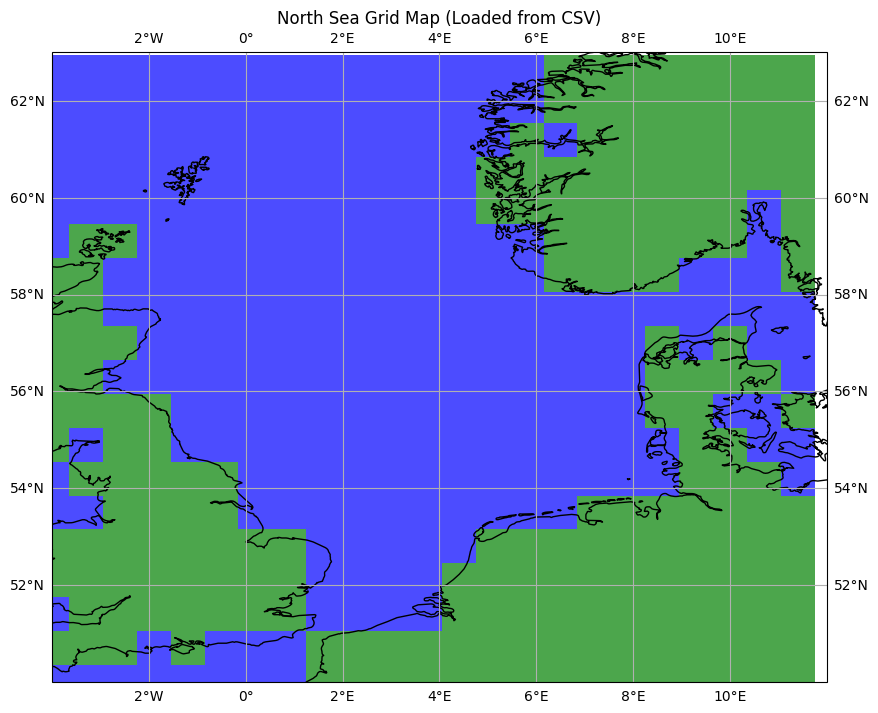

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap

# Load the grid from CSV
df = pd.read_csv("north_sea_grid.csv", index_col=0)

# Extract latitudes, longitudes, and grid
latitudes = df.index.values
longitudes = df.columns.values.astype(float)
grid = df.values

# Define the North Sea boundaries (from the original grid creation)
lat_min, lat_max = 50, 63
lon_min, lon_max = -4, 12

# Plot the grid
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add grid lines
ax.gridlines(draw_labels=True)

# Define a custom colormap
cmap = ListedColormap(['blue', 'green'])  # Blue for water, green for land

# Plot the grid with the custom colormap
ax.pcolormesh(longitudes, latitudes, grid, cmap=cmap, alpha=0.7, transform=ccrs.PlateCarree())

# Add coastlines for reference
ax.coastlines(resolution='10m')

plt.title('North Sea Grid Map (Loaded from CSV)')
plt.show()

In [4]:
import pandas as pd
some = pd.read_csv('filtered_ports_with_x_y.csv')
some['X'] = some['X'].astype(int)
some['Y'] = some['Y'].astype(int)
some.to_csv('filtered_ports_with_x_y.csv', index=False)
